<a href="https://colab.research.google.com/github/puja431996/sumit/blob/master/COVID_19(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

---



In [0]:
# import keras
import tensorflow as tf
from zipfile import ZipFile
from matplotlib import pyplot as plt
import cv2
import os
import seaborn as sn
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import keras
import keras.backend as K
from keras.models import Sequential
from keras import layers 
from keras.applications import VGG16,VGG19
from keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.mobilenet import MobileNet
from keras.optimizers import SGD,Adam,RMSprop
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Check for GPU

---



In [0]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

Mount Google Drive

---



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##UnZip Dataset

---



In [0]:
!cd drive && cd 'My Drive' && cd COVID_19 && cd xray_augmented_mendley && ls

Dataset_All_Augmented.zip


In [0]:

file_name = "/content/drive/My Drive/COVID_19/xray_augmented_mendley/Dataset_All_Augmented.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Dataset All Augmented/                         2020-03-26 09:56:58            0
Dataset All Augmented/COVID-19/                2020-03-26 12:01:12            0
Dataset All Augmented/COVID-19/COVID-19 (1).jpeg 2020-03-26 12:00:24        60413
Dataset All Augmented/COVID-19/COVID-19 (1).jpg 2020-03-26 11:59:26        37991
Dataset All Augmented/COVID-19/COVID-19 (1).png 2020-03-26 11:59:36       319354
Dataset All Augmented/COVID-19/COVID-19 (10).jpeg 2020-03-26 12:00:14        57880
Dataset All Augmented/COVID-19/COVID-19 (10).jpg 2020-03-26 11:59:52        37923
Dataset All Augmented/COVID-19/COVID-19 (100).jpg 2020-03-26 12:00:18        41188
Dataset All Augmented/COVID-19/COVID-19 (101).jpg 2020-03-26 12:00:18        41749
Dataset All Augmented/COVID-19/COVID-19 (102).jpg 2020-03-26 12:00:20        41693
Dataset All Augmented/COVID-19/COVID-19 (103).jpg 2020-03-26 12:00:20        41366
Dataset All Augment

In [0]:
ls

'Dataset All Augmented'/   drive/   sample_data/


In [0]:
!cd 'Dataset All Augmented' && ls

COVID-19  Non-COVID-19


(1024, 1024, 3)


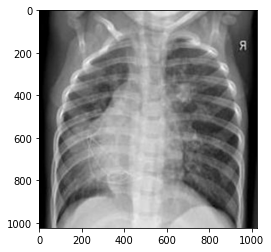

In [0]:
image = cv2.imread('Dataset All Augmented/Non-COVID-19/Non-COVID-19 (93).jpg')
print(image.shape)
plt.imshow(image)
plt.show()

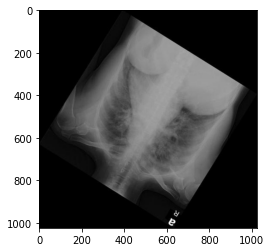

In [0]:
plt.imshow(cv2.imread('Dataset All Augmented/COVID-19/COVID-19 (59).jpg'))

Count No. of Images in each folder

---



Total No of data present in each folder 

COVID-19:912
Non-COVID-19:912


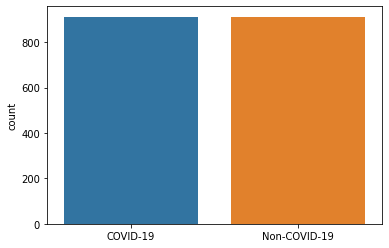

In [0]:

counts = []
dir = 'Dataset All Augmented'
print("Total No of data present in each folder \n")
for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        list1 = os.listdir(path) 
        number_files = len(list1)
        counts = counts + [filename]*number_files
        print (filename + ":"+ str(number_files))

sn.countplot(counts)
plt.show()

#Preprocessing Image/Dataset

---



In [0]:
train_data_dir = 'Dataset All Augmented/'
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
    
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary',
    subset='validation') 

Found 1460 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'COVID-19': 0, 'Non-COVID-19': 1}

#Build Model using VGG16

---



###Model

---



In [0]:
cnv_model = VGG16(input_shape=(224, 224, 3),
                  include_top=False,
                  weights='imagenet',pooling='avg',classes=2)

In [0]:
print("Number of layers in the cvn model: ", len(cnv_model.layers))

Number of layers in the cvn model:  20


In [0]:
model=keras.models.Sequential()
model.add(cnv_model)
model.add(Dense(216,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

###Model Summary

---



In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_13 (Dense)             (None, 216)               110808    
_________________________________________________________________
dropout_9 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                13888     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 14,839,449
Trainable params: 14,839,449
Non-trainable params: 0
__________________________________________

###Compile Model

---



In [0]:
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

###Early Stopping and Create Log file

---



In [0]:
from keras.callbacks import CSVLogger,EarlyStopping
csv_logger = CSVLogger('COVID-19(vgg16).csv', append=False, separator=';')
ES = EarlyStopping(monitor='val_accuracy',mode = 'auto', patience=3)

###Train Model 

---



In [0]:
history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch=46,epochs =10,callbacks=[csv_logger , ES] , validation_steps = 12, verbose = 1)

Epoch 1/10
46/46 [==============================] - 13s 277ms/step - loss: 0.6908 - accuracy: 0.5568 - val_loss: 0.6268 - val_accuracy: 0.8187
Epoch 2/10
46/46 [==============================] - 11s 246ms/step - loss: 0.4957 - accuracy: 0.7973 - val_loss: 0.2442 - val_accuracy: 0.8929
Epoch 3/10
46/46 [==============================] - 11s 246ms/step - loss: 0.2378 - accuracy: 0.9253 - val_loss: 0.0407 - val_accuracy: 0.9176
Epoch 4/10
46/46 [==============================] - 11s 247ms/step - loss: 0.1394 - accuracy: 0.9555 - val_loss: 0.0221 - val_accuracy: 0.9615
Epoch 5/10
46/46 [==============================] - 11s 247ms/step - loss: 0.0816 - accuracy: 0.9788 - val_loss: 0.0135 - val_accuracy: 0.9835
Epoch 6/10
46/46 [==============================] - 11s 247ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0087 - val_accuracy: 0.9863
Epoch 7/10
46/46 [==============================] - 11s 246ms/step - loss: 0.0451 - accuracy: 0.9842 - val_loss: 0.0846 - val_accuracy: 0.9560

###Plot Accuracy

---



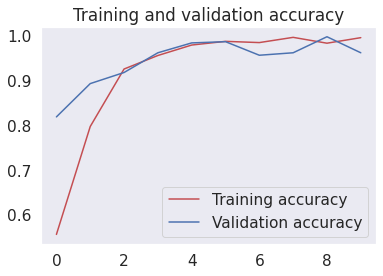

<Figure size 432x288 with 0 Axes>

In [0]:
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
sns.set_style('dark')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

###Plot Loss

---



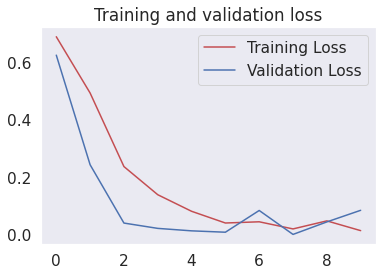

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

###Confusion Matrix and Confusion Report

---



In [0]:
validation_generator.reset()
Y_preds=model.predict_generator(validation_generator)
# print(Y_preds)

y_preds = [i[0] for i in Y_preds]
y_pred = []
for v in y_preds:
  if v <=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

# y_pred = np.argmax(Y_preds, axis=1)
Matrix = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(Matrix)
print('Classification Report')
target_names = ['COVID-19', 'Normal']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[182   0]
 [ 14 168]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.93      1.00      0.96       182
      Normal       1.00      0.92      0.96       182

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



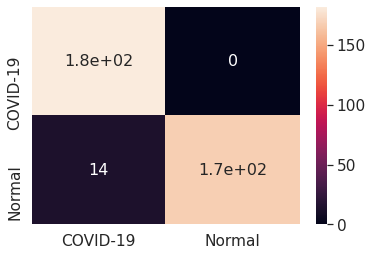

In [0]:
df_cm = pd.DataFrame(Matrix, target_names, target_names)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Save Model in Drive

---



In [0]:
model.save("/content/drive/My Drive/saved_models/covid19_vgg16.h5")

download log file

---



In [0]:
from google.colab import files
files.download('COVID-19(vgg16).csv')

#Testing

---



---



###Load Model

---



In [0]:
from tensorflow.keras.models import Sequential, save_model, load_model

In [0]:
model = load_model("/content/drive/My Drive/saved_models/covid19_vgg16.h5")

###Load image folder for testing

---



In [0]:
test_images_path = "/content/drive/My Drive/COVID_19/covid-chest-xray/images/"

In [0]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [0]:
test_image_arrays = []
for image in os.listdir(test_images_path):
  try:
    im = load_img(
      os.path.join(test_images_path,image),  color_mode='rgb', target_size=(224,224))
    im = img_to_array(im)
    im = im/255.0
    test_image_arrays.append(im)
  except:
    pass


In [0]:
test_image_arrays = np.array(test_image_arrays)

In [0]:
test_image_arrays.shape

(152, 224, 224, 3)

In [0]:
y_preds = model.predict(test_image_arrays)

In [0]:
y_preds = y_preds >=  0.5

In [0]:
y_preds

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [0]:
y_true = [0]*152

In [0]:
mat = confusion_matrix(y_true, y_preds)

In [0]:
mat

array([[152]])

###Plot confusion matrix

---



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
 

    
    
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
mat

array([[152]])

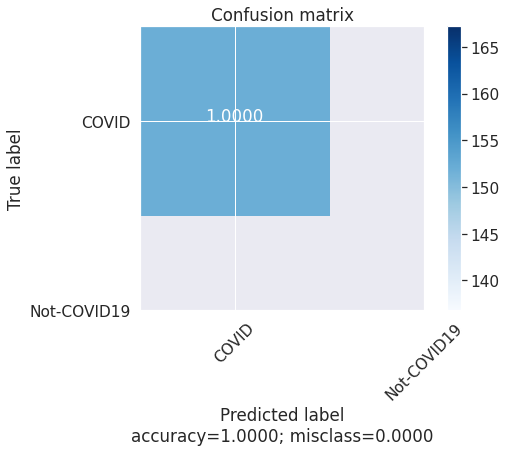

In [0]:
plot_confusion_matrix(mat,["COVID","Not-COVID19"])

###Model summary

---



In [0]:
Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_13 (Dense)             (None, 216)               110808    
_________________________________________________________________
dropout_9 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                13888     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 14,839,449
Trainable params: 14,839,449
Non-trainable params: 0
__________________________________________

###test images

---



In [0]:
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  plt.imshow(img)
  x = image.img_to_array(img)
  
  x = np.expand_dims(x, axis=0)/255.0

  images = np.vstack([x])
  classes = Model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a covid +")
  else:
    print(fn + " is a covid -")

#VGG19

---





---



---



built model

---



In [0]:
vgg_model = VGG19(input_shape=(224, 224, 3),include_top=False,weights='imagenet',pooling='avg',classes=2)
model1=keras.models.Sequential()
model1.add(vgg_model)
model1.add(Dense(216,activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1, activation='sigmoid'))

model summary

---



In [0]:
model1.summary()

compile model

---



In [0]:
model1.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=2e-5, decay=0.0), metrics=['accuracy'])

Earlystopping ang create log file

---



In [0]:
from keras.callbacks import CSVLogger,EarlyStopping
csv_logger = CSVLogger('COVID-19(vgg19).csv', append=False, separator=';')
ES = EarlyStopping(monitor='val_accuracy', mode= 'auto',patience=2)

Train model

---



In [0]:
history1 = model1.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch=46,epochs = 5,callbacks=[csv_logger , ES] ,  verbose = 1)

Plot Accuracy

---



In [0]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()